# Лабораторная работа №3 (Методы спуска)
---
### Работу выполнили:
Обиджанов Алишер<br>
Кузнецов Павел<br>
Казаков Андрей<br>

[*Сслыка на репозиторий*](https://github.com/Iamnotagenius/Primat)

---
### Градиентный спуск с постоянным шагом:
**Теория:**

$F(x_1, x_2, \dots, x_n) \rightarrow min$

Если функция $F$ диффернцируется, то задачу на минимум можно решать с помощью градиентных методов.

$\nabla F(x) =
\left(
    \begin{matrix}
    \frac{\partial F}{\partial x_1}\\
    \frac{\partial F}{\partial x_2}\\
    \dots\\
    \frac{\partial F}{\partial x_n}
    \end{matrix}
\right)$

$x^0=
\left(
    \begin{matrix}
    x^0_1\\
    \dots\\
    x^0_n
    \end{matrix}
\right) \qquad x^1= x^0-\nabla \alpha F(x^0) \qquad x^i=x^{i-1}-\nabla \alpha F(x^{i-1})$

$\alpha$ - скорость спуска, $\alpha > 0$ (Чем меньше $\alpha$, тем точнее шаг)

Для того, что бы найти шаг:

$\nabla F(x^1(\alpha)) \rightarrow \underset{\alpha}{min}$

$\alpha = arg\space\underset{\alpha}{min} \nabla F(x'(\alpha))$

**Реализуем пример в коде:**

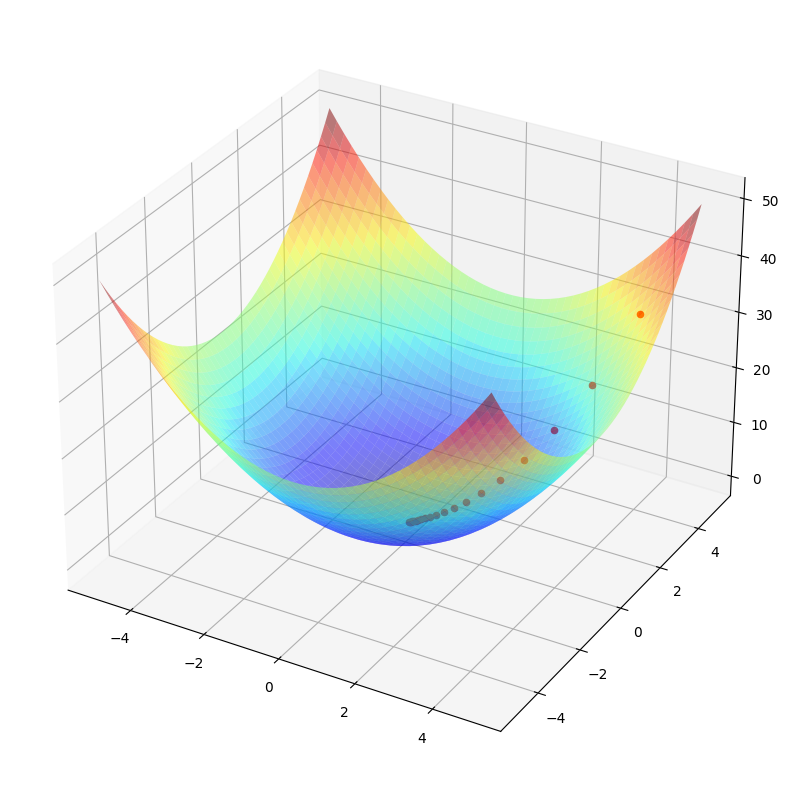

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# определим квадратичную функцию
def f(x, y):
    return x**2 + y**2

# определим производную функции
def grad_f(x, y):
    return np.array([2*x, 2*y])

# определим функцию градиентного спуска
def gradient_descent(start_point, step_size, num_iterations):
    history = [start_point]
    point = np.array(start_point)
    for i in range(num_iterations):
        point = point - step_size * grad_f(point[0], point[1])
        history.append(point)
    return np.array(history)

# зададим начальную точку и скорость спуска
start_point = [4, 4]
step_size = 0.1
num_iterations = 20

# выполним градиентный спуск
history = gradient_descent(start_point, step_size, num_iterations)

# построим график
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
for i in range(num_iterations):
    ax.scatter(history[i,0], history[i,1], f(history[i,0], history[i,1]), color='r')
plt.show()

### Градиентный спуск с дроблением шага и условием Армихо:

Рассматривается функция
$$\phi_k(\alpha):=f(x_k+ad_k)$$
Заметим, что
$$\phi_k(\alpha)=\nabla f(x_k+\alpha d_k)^T d_k$$
Поскольку d_k является направлением спуска, то $\phi'(0)=\nabla f(x_k)^T d_k <0$

**Условием Армихо** для $\alpha$ называется выполнение следующего неравенства:
$$\phi_k(\alpha) \le \phi_k(0) + c_1\alpha\phi'_k(0)$$
где $c_1 \in (0, 0.5)$ - некоторая константа

**Реализуем пример в коде:**

### Метод наискорейшего спуска:

В этом случае мы из точки $x^{[k]}$ будем двигаться в направлении антиградиента до тех пор пока не достигнем минимума функции f на этом направлении, т.е. на луче
$$L={x=x^{[k]}-\lambda f'(x^{[k]});\quad\lambda \le 0}$$
$$\lambda^{[k]}=arg\space\underset{\lambda\in[0,\infty)}{min} f(x^{[K]}-\lambda f'(x^{[k]}))$$

**Реализуем пример в коде:**

### Метод сопряженных градиентов

$$F(x)\rightarrow min, x\in R^n$$

$F(x)$ - неприрывно дифференцируемая в $R^n$ функция. Что бы модифицировать метод сопряжённых градиентов для этой задачи необходимо получить для $p_k,\alpha_k, \beta_k$ формулы, в которые не входит мтарица А:

$$\alpha = arg\underset{\alpha_k}F(x_{k-1}+\alpha_k p_k)$$
$$p_{k+1}=-F'(x_k)+\beta_k p_k$$

1. $\beta_k = -\frac{\langle F'(x_k),F'(x_k) \rangle}{\langle F'(x_{k-1}),F(x_{k-1}) \rangle}$ - Метод Флетчера - Ривса

2. $\beta_k = \frac{\langle F'(x_k),F'(x_k) - F'(x_{k-1}) \rangle}{\langle F'(x_{k-1}),F(x_{k-1}) \rangle}$ - Метод Полака-Райберга

3. $\beta_k = \frac{\langle F''(x_k)p_k,F'(x_k) \rangle}{\langle F''(x_{k-1})p_k,p_k \rangle}$

Если функция $F(x)$ - квадратичная и строго выпуклая, то все три формулы дают одинаковый результат. Если $F(x)$ - произвольная функция, то каждой из формул соответствует своя модификация методта сопряжённых градиентов. Третья формула используется редко, так как она требует, что бы функция $F(x)\in C^2(R^n)$ и вычисления гессиана  функции $F(x)$ на каждом шаге метода

**Реализуем пример в коде:**